<a href="https://colab.research.google.com/github/mahikshith/Langgraph/blob/main/Adding_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install langgraph langchain

In [ ]:
from typing import Dict , TypedDict

from langgraph.graph import StateGraph   # design and manage flow of tasks in ur application usinf graph

## Single node - single input :

In [ ]:
# nodes pass information in the form of state

# state is in dict format

# state is data structure [shared] that keeps a track of everything as ur applcation runs

class AgentState(TypedDict) :
  message : str



# define node - node takes input as state and pass output as state [updated]

# need to add a doc string to expalin the functionality of the agent

def first_node(state : AgentState) -> AgentState :

  '''Simple node in the graph that just shows greet message to the state '''

  state["message"] = "Wasssup " + state["message"] + " how are u doing"

  return state


In [ ]:
# creating graph

gf = StateGraph(AgentState)

gf.add_node("wassup",first_node)

# need to add start and end point of the node

gf.set_entry_point("wassup")

gf.set_finish_point("wassup")

app = gf.compile()


In [ ]:
display(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'wassup': Node(id='wassup', name='wassup', data=wassup(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='wassup', data=None, conditional=False), Edge(source='wassup', target='__end__', data=None, conditional=False)])

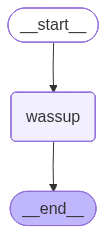

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
ans = app.invoke({"message" : "mykee"})

In [ ]:
ans

{'message': 'Wasssup mykee how are u doing'}

In [ ]:
ans["message"]   # reference the attribute

'Wasssup mykee how are u doing'

## Singel node - multiple input :

In [ ]:
from typing import List , TypedDict

In [ ]:
class stater(TypedDict) :  #  we can name it anyhting we want

  val : List[int]
  name : str
  res :str

In [ ]:
# node

# remember that state is a dict

def process_node(state : stater) -> stater :

  ''' this node process the info in the state and returns a result'''

  print(f"this is before : {state}")

  state["res"] = state["name"] + " , here is the sum of vals in the given list " + str(sum(state["val"]))

  print(f"this is after : {state}")



  return state

In [ ]:
# adding node to graph

gf = StateGraph(stater)

gf.add_node("process",process_node)

gf.set_entry_point("process")

gf.set_finish_point("process")

app = gf.compile()


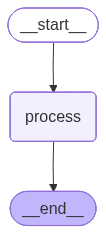

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
#  val : List[int]
#   name : str
#   res :str

ans = app.invoke({"val":[50,45,22,89], "name": "mykee"})

this is before : {'val': [50, 45, 22, 89], 'name': 'mykee'}
this is after : {'val': [50, 45, 22, 89], 'name': 'mykee', 'res': 'mykee , here is the sum of vals in the given list 206'}


In [ ]:
ans["res"]

'mykee , here is the sum of vals in the given list 206'

## Single node - multi input - if else :

In [ ]:
# if operation = "+" then add , if operation = "*" then multiply

# state

class operate(TypedDict) :

  val1 : List[int]
  strin : str
  operation : str
  result : str

In [ ]:
# node

import math

def noder(state : operate) -> operate :

  ''' thids node processes input via if-else'''

  if state["operation"] == "+" :

    state["result"] = f"Hey, {state["strin"]} the selected operator is sum and the value is : " + str(sum(state["val1"]))

  elif state["operation"] == "*":
    state["result"] = f"Hey,  {state["strin"]} the selected operator is multiplication and val is : " + str(math.prod(state["val1"]))

  else :
    state["result"] = "Invalid operation"

  return state


In [ ]:
# adding node to the state graph

gf = StateGraph(operate)

gf.add_node("operations",noder)

gf.set_entry_point("operations")

gf.set_finish_point("operations")

app = gf.compile()

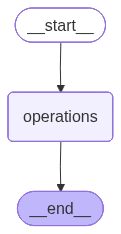

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
  # val1 : List[int]
  # strin : str
  # operation : str
  # result : str

r = input("enter a name: ")

k = input("enter the operation : [*] or [+]")

print("enter the number with spaces and then press enter")

li = list(map(int,input().split()))

ans = app.invoke({"val1":li,"strin":r, "operation": k})

enter a name: mykee
enter the operation : [*] or [+]*
enter the number with spaces and then press enter
1 2 3 4 5 6 7 8 9 10


In [ ]:
ans["result"]


'Hey,  mykee the selected operator is multiplication and val is : 3628800'

## multiple nodes : sequential  graph :

In [ ]:
# name , age , skills

class person(TypedDict) :   # state

  name : str

  age : int

  skills : list[str]

  result : str


# nodes


def first_node(state : person) -> person :

  ''' this first node greets user '''

  state["result"] = f"hello {state["name"]}  , welcome"

  return state

def second_node(state : person) -> person :

  ''' this second  node tells user  age '''

  state["result"] = state["result"] + f" you are {state["age"]}  years old "

  return state

def third_node(state : person) -> person :

  ''' this third   node tells user  their skills '''

  state["result"] = state["result"] + f"these are your skills {state["skills"]}  and keep improving them"

  return state



In [ ]:
# adding nodes to graph

gf = StateGraph(person)

gf.add_node("greet",first_node)
gf.add_node("age",second_node)
gf.add_node("skills",third_node)

gf.set_entry_point("greet")
gf.set_finish_point("skills")

gf.add_edge("greet","age")
gf.add_edge("age","skills")

app = gf.compile()

In [ ]:
name = input("enter your name : ")
age = int(input("enter your age : "))
skills = list(map(str,input("enter your skills : ").split()))

ans = app.invoke({"name":name,"age":age,"skills":skills})


enter your name : mykee
enter your age : 25
enter your skills : py sql lang mL dL sql


In [ ]:
ans["result"]

"hello mykee  , welcomeyou are 25  years old these are your skills ['py', 'sql', 'lang', 'mL', 'dL', 'sql']  and keep improving them"

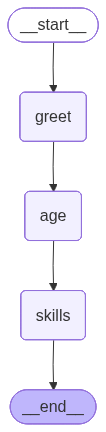

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

## conditional node :

In [ ]:
# implement conditional node

from typing import TypedDict

from langgraph.graph import StateGraph, START, END

In [ ]:
# define state

class condit(TypedDict) :

  number1 : int

  number2 : int

  operate : str

  result : int

In [ ]:
# define nodes  :

def add(state : condit) -> condit :

  ''' this node adds two numbers'''

  state["result"] = state["number1"] + state["number2"]


  return state

def sub(state : condit) -> condit :

  ''' this node subtracts two numbers'''

  state["result"] = state["number1"] - state["number2"]

  return state

# conditional node

def decide(state : condit) -> condit :   # this needs to return edges rather than state

  ''' this node routes the edges to select the nodes'''

  if state["operate"] == "+" :

    return "add_edge"

  elif state["operate"] == "-" :

    return "sub_edge"

In [ ]:
# graph

gf = StateGraph(condit)

gf.add_node("add_node",add)
gf.add_node("sub_node",sub)
gf.add_node("router",lambda state: state)  # acting like a pass through

gf.add_edge(START,"router")

gf.add_conditional_edges("router",decide,

                         {"add_edge" : "add_node",  # edge : node
                          "sub_edge" : "sub_node"})
gf.add_edge("add_node",END)
gf.add_edge("sub_node",END)

# gf.compile()



In [ ]:
app = gf.compile()

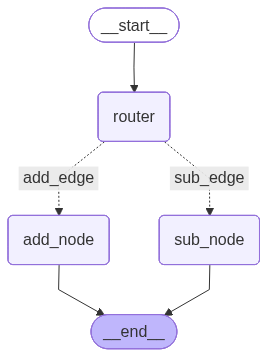

In [ ]:
app

In [ ]:
ans  = app.invoke({"number1":10, "number2":15,"operate" :"+"})

In [ ]:
ans["result"]

25

In [ ]:
intail  =condit(number1 = 22 , number2 = 130 , operate = "+")

app.invoke(intail)

{'number1': 22, 'number2': 130, 'operate': '+', 'result': 152}

## double conditional node :

In [ ]:
from typing import TypedDict

from langgraph.graph import START,END,StateGraph

In [ ]:
class doubleroute(TypedDict) :  # define state

  number1 : int
  operation1 : str

  number2 : int

  number3 : int

  operation2 : str


  result1 : int

  result2 : int

In [ ]:
# define nodes

def add1(state : doubleroute) -> doubleroute :

  ''' this node adds two nums'''

  print("adder node 1")

  state["result1"] = state["number1"] + state["number2"]

  return state

def sub1(state : doubleroute) -> doubleroute :


  ''' this node subs  two nums'''

  print("sub node 1")

  state["result1"] = state["number1"] - state["number2"]

  return state

def decide1(state : doubleroute) -> doubleroute :  # condotional nodes return edges rather than state


  ''' this node routes the  nodes'''

  if state["operation1"] == "+" :

    return "add1_edge"

  elif state["operation1"] == "-" :

    return "sub1_edge"



def add2(state : doubleroute) -> doubleroute :

  ''' this node adds two nums from the previous result'''

  print("adder node 2")

  state["result2"] = state["result1"] + state["number3"]

  return state

def sub2(state : doubleroute) -> doubleroute :


  ''' this node subs  two nums from the previous result'''

  print("subber node 2")

  state["result2"] = state["result1"] - state["number3"]

  return state

def decide2(state : doubleroute) -> doubleroute :  # condotional nodes return edges rather than state


  ''' this node routes the  nodes'''

  if state["operation2"] == "+" :

    return "add2_edge"

  elif state["operation2"] == "-" :

    return "sub2_edge"




In [ ]:
# graph

gf = StateGraph(doubleroute)

gf.add_node("adder_node",add1)
gf.add_node("subber_node",sub1)

gf.add_node("adder_node2",add2)
gf.add_node("subber_node2",sub2)

gf.add_node("router1",lambda state: state)  # acting like a pass through [creating router node]

gf.add_node("router2",lambda state: state)

gf.add_edge(START,"router1")

gf.add_conditional_edges("router1",decide1, # edge : node

                         {"add1_edge" : "adder_node",
                          "sub1_edge" : "subber_node"})


gf.add_edge("adder_node","router2")
gf.add_edge("subber_node","router2")

gf.add_conditional_edges("router2",decide2,
                         # edge : node
                         {"add2_edge" : "adder_node2",
                          "sub2_edge" : "subber_node2"})

gf.add_edge("adder_node2",END)
gf.add_edge("subber_node2",END)


app = gf.compile()


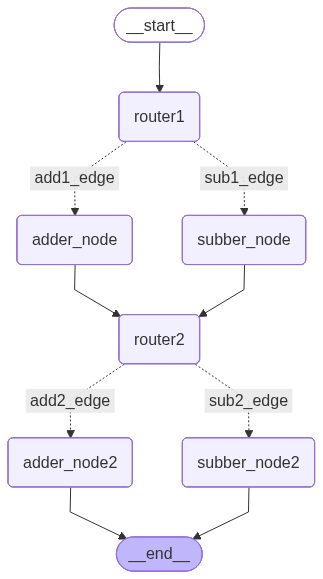

In [ ]:
app

In [ ]:
intial = doubleroute(number1 = 10, operation1 = "+", number2 = 15, number3 = 20, operation2 = "+")

ans = app.invoke(intial)


adder node 1
adder node 2


In [ ]:
ans["result2"]

45

In [ ]:
rap = doubleroute(number1 = 10, operation1 = "+", number2 = 15, number3 = 20, operation2 = "-")

ans = app.invoke(rap)

adder node 1
subber node 2


In [ ]:
ans["result2"]

5

## looping node :

In [ ]:
from typing import List

from langgraph.graph import START,END,StateGraph

In [ ]:
import random

class looper(TypedDict) :

  name : str

  ra_li : List[int]

  counter : int


# node

def normal(state : looper) -> looper :

  ''' this node just greets'''

  state["name"] = f"hello {state["name"]}"

  state["counter"] = 0

  return state

def random_node(state : looper) -> looper :

  ''' this node generates random numbers'''

  state["ra_li"].append(random.randint(0,200))


  state["counter"] = state["counter"] + 1

  return state

def conditional_loop(state : looper) -> looper :

  # this is conditional edge - returns edges not state

  if state["counter"] < 10 and len(state["ra_li"])<=10:
    # len(state["ra_li"])<=10 if u remove this then when ever u invoke ra_li gets appeneded with new randm numbers

    return "random_edge"

  else :

     return "exit"

In [ ]:
# graph
gf = StateGraph(looper)

gf.add_node("normal_node",normal)
gf.add_node("random_node",random_node)

# conditional edge : source , action

gf.add_conditional_edges("random_node",conditional_loop,
                         {"random_edge":"random_node",
                          "exit"  :END} )

gf.add_edge(START,"normal_node")
gf.add_edge("normal_node","random_node")

gf.set_entry_point("normal_node")

app = gf.compile()


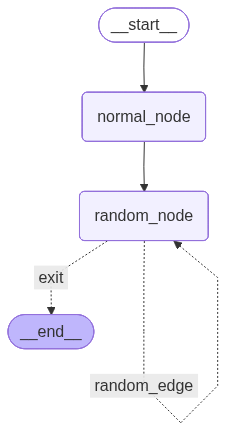

In [ ]:
app

In [ ]:
xp = looper(name="mykee",ra_li=[],counter=-100)

In [ ]:
ans = app.invoke(xp)

In [ ]:
ans

{'name': 'hello mykee',
 'ra_li': [156, 69, 1, 29, 43, 8, 39, 179, 117, 93],
 'counter': 10}

## Lopper - guesser :

In [ ]:
# state

class guessit(TypedDict):
  name : str
  target_number : int
  guesses : List[int]
  attempts : int
  hint : str
  lower_bound : int
  upper_bound : int




In [ ]:
import random

### Solve this later --> [there should be no human intervention in this loop  u need to loop the node]

In [ ]:
# nodes

def setup_node(state : guessit) -> guessit :

  ''' this node setsup the problem '''

  state["name"] = input("hello please enter your name : ")

  state["target_number"] = random.randint(0,20)

  state["guesses"] = []

  state["attempts"] = 0

  state["lower_bound"] = 0

  state["upper_bound"] = 20

  print(f"{state["name"]} has started guessing the number between 0 and 20")

  return state


def guesser_node(state : guessit) -> guessit :

  ''' this node takes guess from user and checks against the number  '''

  guess = int(input("enter your guess between 0 and 20: "))

  state["guesses"].append(guess)

  state["attempts"] = state["attempts"] + 1

## Includign LLMS into graph structure :

In [ ]:
!pip install langchain-google-genai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


In [ ]:
from google.colab import userdata
api = userdata.get('lang_graph')  # gettign api key from colab env

In [ ]:
! pip install langgraph langchain

from langgraph.graph import StateGraph , START , END

from typing import TypedDict , List

from langchain_core.messages import HumanMessage

from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
# state

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",api_key=api,max_tokens=170)

class llm_state(TypedDict) :

  message : List[HumanMessage]


def request_process(state : llm_state) -> llm_state :

  resp = llm.invoke(state["message"])

  print(f" response by ai : {resp.content}")

  return state



In [ ]:
# graph

gf = StateGraph(llm_state)

gf.add_node("rq_process",request_process)

gf.add_edge(START,"rq_process")

gf.add_edge("rq_process",END)

app = gf.compile()

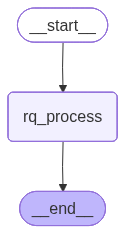

In [ ]:
app

In [ ]:
# taking input from user :

inp = input("enter ur message : ")


while True :

  if inp.lower() == "exit" :

    print("end of our journey bye :> ")

    break

  hum_msg = HumanMessage(content=inp)

  intial = llm_state(message=[hum_msg])

  ans = app.invoke(intial)

  inp = input("enter ur message : ")




enter ur message : what is the distance between earth and moon according to hanuman chalisa
 response by ai : The Hanuman Chalisa does not provide a specific distance between the Earth and the Moon.

The Hanuman Chalisa is a devotional hymn that praises Lord Hanuman. Its verses are primarily focused on his divine qualities, his devotion to Lord Rama, and his heroic deeds. It is a spiritual text, not a scientific or astronomical one, and therefore does not contain any measurements or calculations related to celestial distances.
enter ur message : look depper into hanuman chalisa there must be a mention of distance baout it
 response by ai : You're right to look deeper! The Hanuman Chalisa is rich with imagery and symbolism, and while it doesn't explicitly state distances in modern units (like kilometers or miles), it uses powerful metaphors and references that imply vastness and speed, which can be interpreted as a form of "distance."

Let's explore how the Hanuman Chalisa alludes to im

## Memory history -- conversation history agent :

In [ ]:
from langgraph.graph import StateGraph , START , END

from typing import TypedDict ,List , Union


from langchain_core.messages import HumanMessage , AIMessage

from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
# state

class mem(TypedDict) :

  message : List[Union[HumanMessage, AIMessage]]



In [ ]:
# defining nodes

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",api_key=api)

def process_node(state :mem) -> mem :
  ''' this node process the given output '''

  resp = llm.invoke(state["message"])

  state["message"].append(AIMessage(content=resp.content))

  print(f" response by ai : {resp.content}")

  print(f"cuurent state  : {state["message"]}")

  return state


In [ ]:
# graph :

gf = StateGraph(mem)

gf.add_node("process_node",process_node)

gf.add_edge(START,"process_node")

gf.add_edge("process_node",END)

app = gf.compile()

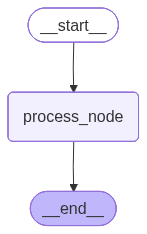

In [ ]:
app

In [ ]:
# passing input and storign the response :

conversation = []

inp = input("enter ur message : ")

while True :

  if inp.lower() == "exit" :

    print("end of our journey bye :> ")

    break

  hum_msg = HumanMessage(content=inp)

  conversation.append(hum_msg)

  result = app.invoke(mem(message=conversation))

  conversation = result["message"]

  inp = input("enter ur message : ")

enter ur message : hi my name is vijay
 response by ai : Hi Vijay, it's nice to meet you! How can I help you today?
cuurent state  : [HumanMessage(content='hi my name is vijay', additional_kwargs={}, response_metadata={}), AIMessage(content="Hi Vijay, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={})]
enter ur message : is hyderabad safe for women after 12 pm , explain in 2 sentences
 response by ai : Hyderabad is generally considered a safe city for women, even after midnight, with a noticeable police presence in many areas. However, like any large city, it's always advisable to exercise caution and be aware of your surroundings, especially in less crowded or dimly lit places.
cuurent state  : [HumanMessage(content='hi my name is vijay', additional_kwargs={}, response_metadata={}), AIMessage(content="Hi Vijay, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={}), HumanMessage(content='is hyderabad s

In [ ]:
# saving the log - conversation  :

with open("convo_log.txt","w") as f :
  f.write("your convo log with gemini : \n")

  for each_msg in conversation :
    if isinstance(each_msg,HumanMessage) :
      f.write(f"user : {each_msg.content}\n")
    elif isinstance(each_msg,AIMessage) :
      f.write(f"ai : {each_msg.content}\n")
  f.write("End of convo with ai")

print("convo saved to convo_log.txt")


convo saved to convo_log.txt


## Simple ReAct agent :

In [ ]:
! pip install langgraph langchain

In [ ]:
!pip install langchain-google-genai

In [4]:
from typing import Annotated, Sequence, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_core.tools import tool
from langgraph.graph.message import add_messages

from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode

In [20]:
# state

class reaction(TypedDict):
  messages : Annotated[Sequence[BaseMessage],add_messages]


In [21]:
# tool

@tool
def add(a :int , b : int):
  ''' this addition function adds two numbers'''

  return a+b


@tool
def mult(a:int , b: int):
  ''' this multiplication function multiplies two numbers'''

  return a*b

@tool
def square(a:int ,b: int):
  ''' this square function squares a number'''

  return a**b

@tool
def sub(a:int , b: int):
  ''' this subtraction function subtracts two numbers'''

  return a-b

@tool
def div(a:int , b: int):
  ''' this division function finds floor division for two numbers'''

  return a//b

tools = [add,mult,square,sub,div]


In [22]:
from google.colab import userdata
api = userdata.get('lang_graph')

In [23]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",api_key=api).bind_tools(tools)

In [24]:
# nodes :

def process(state : reaction) -> reaction :

  sys_prompt = SystemMessage(content="you are a helpful agent please answer the questions or call tools")

  resp = model.invoke([sys_prompt] + state["messages"])

  # state["message"].append(resp)

  # return state    # this is how we traditionally do but now we have add_messages to do this for us

  return {"messages": [resp]}

def decide_node(state : reaction) :

  msg = state["messages"]

  last_msg = msg[-1]

  if last_msg.tool_calls:
    return "tool_call_continue"

  else :
    return "end"


In [25]:
gf = StateGraph(reaction)
gf.add_node("Agent",process)



# tool node
tool_node = ToolNode(tools=tools)
gf.add_node("tool_noder",tool_node)

gf.add_conditional_edges("Agent" ,decide_node,
                         {"tool_call_continue" :"tool_noder",
                         "end":END })
gf.add_edge("tool_noder","Agent")

gf.set_entry_point("Agent")


app = gf.compile()

In [26]:
# pip install grandalf


In [27]:
# print("--- ASCII Graph Representation ---")
# app.get_graph().print_ascii()
# print("--------------------------------")

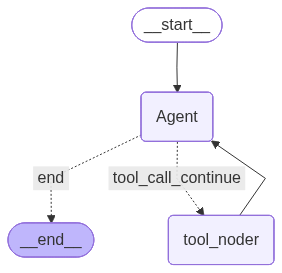

In [28]:
app

In [29]:
ans = app.invoke(reaction(messages=[HumanMessage(content="Please Add 40 + 12")]))

In [30]:
ans

{'messages': [HumanMessage(content='Please Add 40 + 12', additional_kwargs={}, response_metadata={}, id='590fb84c-eaa0-4c80-b2df-35a04d702e6e'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 40, "b": 12}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--f2fce60f-256b-422c-a9ed-33dddfe6f9dc-0', tool_calls=[{'name': 'add', 'args': {'a': 40, 'b': 12}, 'id': '518cef38-d7d2-4ab9-806c-31e59bffa7eb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 261, 'output_tokens': 20, 'total_tokens': 281, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='52', name='add', id='03547695-fee9-4622-aafb-e79c90386f26', tool_call_id='518cef38-d7d2-4ab9-806c-31e59bffa7eb'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0

In [31]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()


In [34]:

inputs = reaction(messages=[HumanMessage(content="Please Add 1000 + 15000")])

# or

inputs = reaction(messages=[("user",'''Please Add 2000 + 2000 and then mutiply by 6 ,
divide by 200 and then find the square with 23''')])


# or inputs = {"messages": [("user", "Add 40 + 12 and then multiply the result by 6. Also tell me a joke please.")]}

print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Please Add 2000 + 2000 and then mutiply by 6 ,
divide by 200 and then find the square with 23
================================== Ai Message ==================================
Tool Calls:
  add (6cc6a257-8508-4440-bba0-f4432a118d2f)
 Call ID: 6cc6a257-8508-4440-bba0-f4432a118d2f
  Args:
    a: 2000
    b: 2000
================================= Tool Message =================================
Name: add

4000
================================== Ai Message ==================================
Tool Calls:
  mult (d825e6c6-6f63-4bd2-9764-8e1ee7603583)
 Call ID: d825e6c6-6f63-4bd2-9764-8e1ee7603583
  Args:
    a: 4000
    b: 6
================================= Tool Message =================================
Name: mult

24000
================================== Ai Message ==================================
Tool Calls:
  div (854deb59-1bbf-4b82-9e2a-d5357e28d152)
 Call ID: 854deb59-1bbf-4b82-9e2a-d5357e28d152
  Args:
   

> In ReAct agent most of the times , the tools go back to agent and has no connection to END

## Drafting agent :

>this time we pass the state into the tools

> Here the llm updates the content and saves the file as well

> Human - AI collabaration :  

idea is if we will first ask the agent to draft / ask something and show the result if we want to make any changes to it we can specify if not then save it.

we need save tool and update the content tool for this

In [10]:
from typing import Annotated, Sequence, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_core.tools import tool
from langgraph.graph.message import add_messages

from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode

In [11]:
from google.colab import userdata
api = userdata.get('lang_graph')

In [12]:
# state  :

doc_content = ""

class drafter(TypedDict):
  messages : Annotated[Sequence[BaseMessage],add_messages]


In [13]:
# tools

@tool
def update_content(content : str) -> str :
  '''this updated the document with provided content'''

  global doc_content

  doc_content = content

  return f"the document has been updated , and this is the current content for now : /n {doc_content}"


@tool
def save_file(filename :str) -> str :

  '''save the current content to a file in .txt format'''

  global doc_content

  if not filename.endswith(".txt") :
    filename = f"{filename}.txt"

  try:
    with open(filename,"w") as f :
      f.write(doc_content)

    print(f" the file has been updated successfully and saved in the file{filename}")

    return f"file has been saved to {filename}"

  except Exception as e :
    print(f"error occured while saving the file : {e}")




In [14]:
tools = [update_content,save_file]

In [15]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",api_key=api).bind_tools(tools)

In [16]:
# nodes

def process(state : drafter) -> drafter :

  sys_prompt = SystemMessage(content=f'''

   You are helpful drafter, aka helpful writing assistant. You are going to help the user update and modify documents.
   - If a user want to update or modify the content u need to use "update_content" tool and update content.
   - If a user want to save the final draft or content just use "save_file" tool
   - In the end make sure always show the current state after the modifications, current state of the document is : {doc_content}

  ''')

  if not state["messages"] :

    user_input = " I'm ready to  help u update a document what would u like to create"

    user_message = HumanMessage(content=user_input)

  else :

    user_input = input("what do u want to do to the document : ")

    user_message = HumanMessage(content=user_input)

    print(f"/n user : {user_input}")


  resp = llm.invoke([sys_prompt] + list(state["messages"]) + [user_message] )

  print(f"AI response : {resp.content}")

  return {"messages" : list(state["messages"]) + [user_message, resp]}


# conditional node :

def decide_node(state : drafter) -> str :

  '''Check if we need to continue to agent or end'''

  messages = state["messages"]

  if not messages :
    return "continue"

  # if after accessing tools and the last tool message is about saving the file then we can end the process

  for each in reversed(messages):

    if (isinstance(each, ToolMessage) and
            "saved" in each.content.lower() and
            "document" in each.content.lower()):
            return "end"

  return "continue"




In [ ]:
# graph

gf = StateGraph(drafter)

gf.add_node("Draft_agent",process)

tools = ToolNode(tools=tools)

gf.add_node("tools",tools)

gf.add_edge("Draft_agent","tools")

gf.add_conditional_edges("Draft_agent",decide_node,
                         {"continue" : "Draft_agent",
                          "end" : END})

gf.set_entry_point("Draft_agent")

app = gf.compile()

In [18]:
doc_content = ""
app.invoke(drafter(messages=[]))

AI response : I'm ready to help! Please tell me what you'd like to create or update in the document. For example, you can say:

*   "Add a title: 'My Project Proposal'"
*   "Write an introduction about the importance of renewable energy."
*   "Include a section on the budget with the following details: ..."
*   "Revise the last paragraph to be more concise."
*   "Save the document as 'project_proposal.txt'."
what do u want to do to the document : draft an sick leave email
/n user : draft an sick leave email
AI response : 
what do u want to do to the document : draft a sick leave emial
/n user : draft a sick leave emial
AI response : 


KeyboardInterrupt: 